<a href="https://colab.research.google.com/github/Yurakc/platzi_data/blob/main/Curso%20de%20Fundamentos%20Pr%C3%A1cticos%20de%20Machine%20Learning/22_24_Kmeans_(K_Similitudes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
iris = datasets.load_iris()

In [3]:
X_iris = iris.data
Y_iris = iris.target

In [4]:
x = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns = ['Target'])
x.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

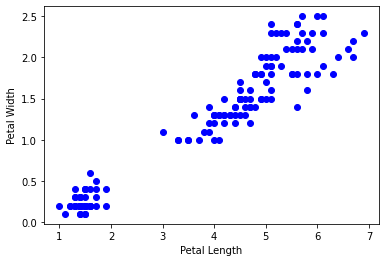

In [5]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [6]:
model = KMeans(n_clusters=2, max_iter= 1000)
model.fit(x)
y_labels = model.labels_

In [7]:
y_kmeans = model.predict(x)
print('Predictions', y_kmeans)

Predictions [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [8]:
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
accuracy

0.5399218294207123

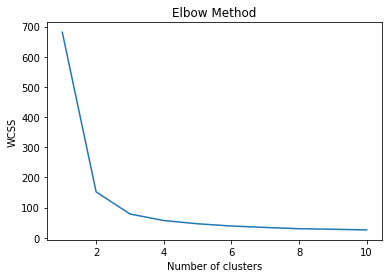

In [9]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,max_iter=1000, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
model = KMeans(n_clusters=3, max_iter= 1000)
model.fit(x)
y_labels = model.labels_

In [11]:
y_kmeans = model.predict(x)
print('Predictions', y_kmeans)

Predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [12]:
accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
accuracy

0.7302382722834697

Text(0, 0.5, 'Petal Width')

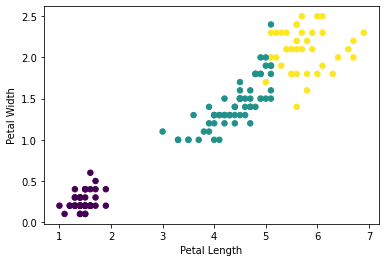

In [13]:
plt.scatter(x['Petal Length'], x['Petal Width'], c = y_kmeans, s= 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)